<a href="https://colab.research.google.com/github/yulita231/Learning-Journey/blob/main/shoppingBehavior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
import networkx as nx
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/shopping_behavior_updated.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


# **🔧 One-Hot Encoding for Association Analysis**

In [ ]:
items = pd.get_dummies(df[['Item Purchased','Category','Color','Size','Season','Shipping Type','Payment Method','Subscription Status']])
items.head()

,Item Purchased_Backpack,Item Purchased_Belt,Item Purchased_Blouse,Item Purchased_Boots,Item Purchased_Coat,Item Purchased_Dress,Item Purchased_Gloves,Item Purchased_Handbag,Item Purchased_Hat,Item Purchased_Hoodie,...,Shipping Type_Standard,Shipping Type_Store Pickup,Payment Method_Bank Transfer,Payment Method_Cash,Payment Method_Credit Card,Payment Method_Debit Card,Payment Method_PayPal,Payment Method_Venmo,Subscription Status_No,Subscription Status_Yes
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


# **Frequent Itemsets (Apriori)¶**

In [ ]:
freq = apriori(items, min_support=0.05, use_colnames=True)
freq.head()

,support,itemsets
0,0.317949,(Category_Accessories)
1,0.445385,(Category_Clothing)
2,0.153590,(Category_Footwear)
3,0.083077,(Category_Outerwear)
4,0.270000,(Size_L)


# **📈 Association Rules**

In [ ]:
rules = association_rules(freq, metric='lift', min_threshold=1)
rules_sorted = rules.sort_values('lift', ascending=False)
rules_sorted.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
199,"(Subscription Status_No, Size_L)",(Season_Winter),0.194359,0.248974,0.053846,0.277045,1.112745,1.0,0.005456,1.038827,0.125765,0.138249,0.037376,0.246658
202,(Season_Winter),"(Subscription Status_No, Size_L)",0.248974,0.194359,0.053846,0.216272,1.112745,1.0,0.005456,1.027960,0.134910,0.138249,0.027199,0.246658
246,(Payment Method_Bank Transfer),"(Subscription Status_No, Size_M)",0.156923,0.328974,0.056410,0.359477,1.092721,1.0,0.004787,1.047622,0.100647,0.131343,0.045457,0.265475
243,"(Subscription Status_No, Size_M)",(Payment Method_Bank Transfer),0.328974,0.156923,0.056410,0.171473,1.092721,1.0,0.004787,1.017561,0.126453,0.131343,0.017258,0.265475
3,(Size_S),(Category_Accessories),0.170000,0.317949,0.058974,0.346908,1.091082,1.0,0.004923,1.044342,0.100576,0.137478,0.042459,0.266196
2,(Category_Accessories),(Size_S),0.317949,0.170000,0.058974,0.185484,1.091082,1.0,0.004923,1.019010,0.122393,0.137478,0.018655,0.266196
203,(Size_L),"(Subscription Status_No, Season_Winter)",0.270000,0.183846,0.053846,0.199430,1.084767,1.0,0.004208,1.019466,0.107045,0.134615,0.019094,0.246159
198,"(Subscription Status_No, Season_Winter)",(Size_L),0.183846,0.270000,0.053846,0.292887,1.084767,1.0,0.004208,1.032367,0.095745,0.134615,0.031352,0.246159
20,(Category_Accessories),(Payment Method_PayPal),0.317949,0.173590,0.059487,0.187097,1.077810,1.0,0.004295,1.016616,0.105847,0.137685,0.016344,0.264893
21,(Payment Method_PayPal),(Category_Accessories),0.173590,0.317949,0.059487,0.342688,1.077810,1.0,0.004295,1.037638,0.087357,0.137685,0.036272,0.264893


# **Lift × Confidence Visualization**

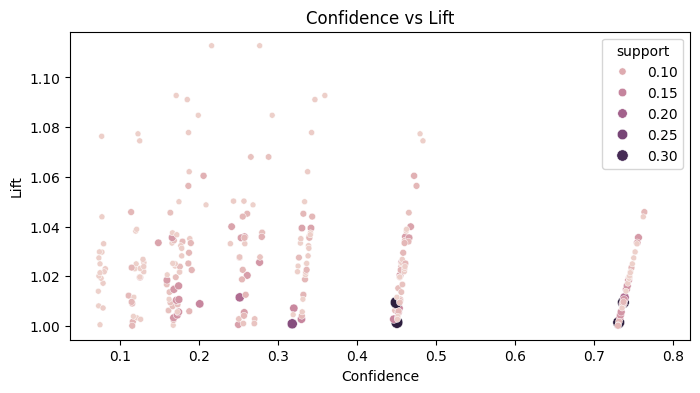

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=rules, x='confidence', y='lift', size='support', hue='support', legend=True)
plt.title('Confidence vs Lift')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.show()

# **Network Graph of Top Rules¶**

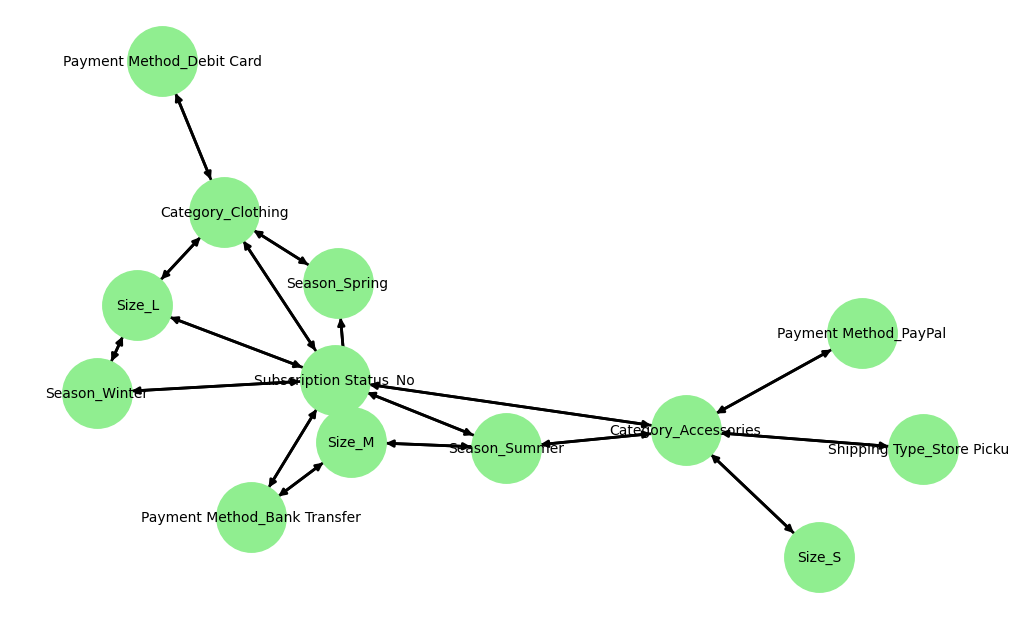

In [ ]:

G = nx.DiGraph()
for _, row in rules_sorted.head(30).iterrows():
    for a in row['antecedents']:
        for c in row['consequents']:
            G.add_edge(a, c, weight=row['lift'])

plt.figure(figsize=(10,6))
pos = nx.spring_layout(G, k=0.4, iterations=50)
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=2500, font_size=10, width=2)
plt.show()

# **📊 Category × Payment Method × Shipping Heatmap¶**

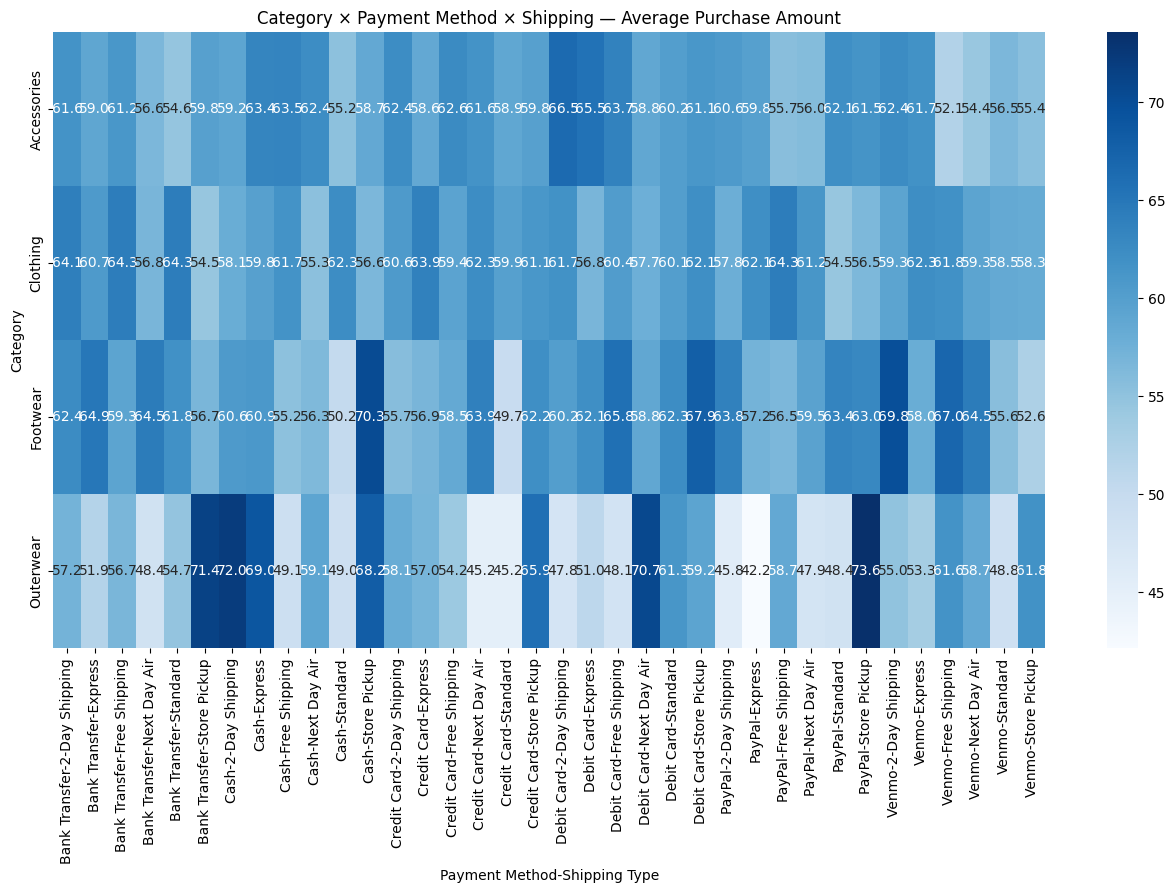

In [ ]:

pivot = df.pivot_table(
    index='Category',
    columns=['Payment Method', 'Shipping Type'],
    values='Purchase Amount (USD)',
    aggfunc='mean'
)

plt.figure(figsize=(16,8))
sns.heatmap(pivot, annot=True, fmt='.1f', cmap='Blues')
plt.title('Category × Payment Method × Shipping — Average Purchase Amount')
plt.show()